In [1]:
import matplotlib.pyplot as plt

In [2]:
img = plt.imread('Flag_of_India.svg.webp')

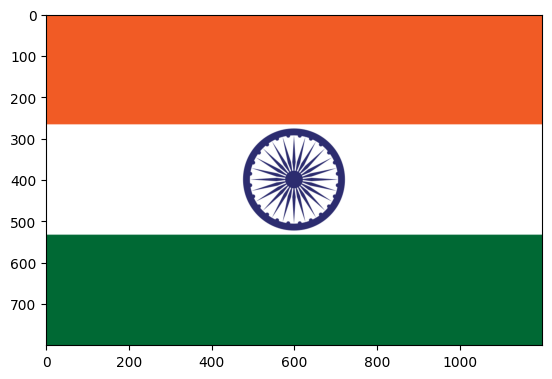

In [4]:
plt.imshow(img)

In [6]:
img.shape

(800, 1200, 3)

In [7]:
img

array([[[241,  91,  37],
        [241,  91,  37],
        [241,  91,  37],
        ...,
        [241,  91,  37],
        [241,  91,  37],
        [241,  91,  37]],

       [[241,  91,  37],
        [241,  91,  37],
        [241,  91,  37],
        ...,
        [241,  91,  37],
        [241,  91,  37],
        [241,  91,  37]],

       [[241,  91,  37],
        [241,  91,  37],
        [241,  91,  37],
        ...,
        [241,  91,  37],
        [241,  91,  37],
        [241,  91,  37]],

       ...,

       [[  0, 105,  52],
        [  0, 105,  52],
        [  0, 105,  52],
        ...,
        [  0, 105,  52],
        [  0, 105,  52],
        [  0, 105,  52]],

       [[  0, 105,  52],
        [  0, 105,  52],
        [  0, 105,  52],
        ...,
        [  0, 105,  52],
        [  0, 105,  52],
        [  0, 105,  52]],

       [[  0, 105,  52],
        [  0, 105,  52],
        [  0, 105,  52],
        ...,
        [  0, 105,  52],
        [  0, 105,  52],
        [  0, 105,  52]]

##### Import the libraries

In [44]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.utils import to_categorical
import numpy as np

##### Load the dataset

In [12]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [14]:
x_train.shape

(60000, 28, 28)

In [15]:
y_train.shape

(60000,)

In [16]:
x_test.shape

(10000, 28, 28)

In [17]:
y_test.shape

(10000,)

In [18]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

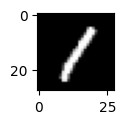

In [24]:
plt.figure(figsize=(1,1))
plt.imshow(x_train[23], cmap='gray')

In [25]:
y_train[23]

1

##### Explore the images

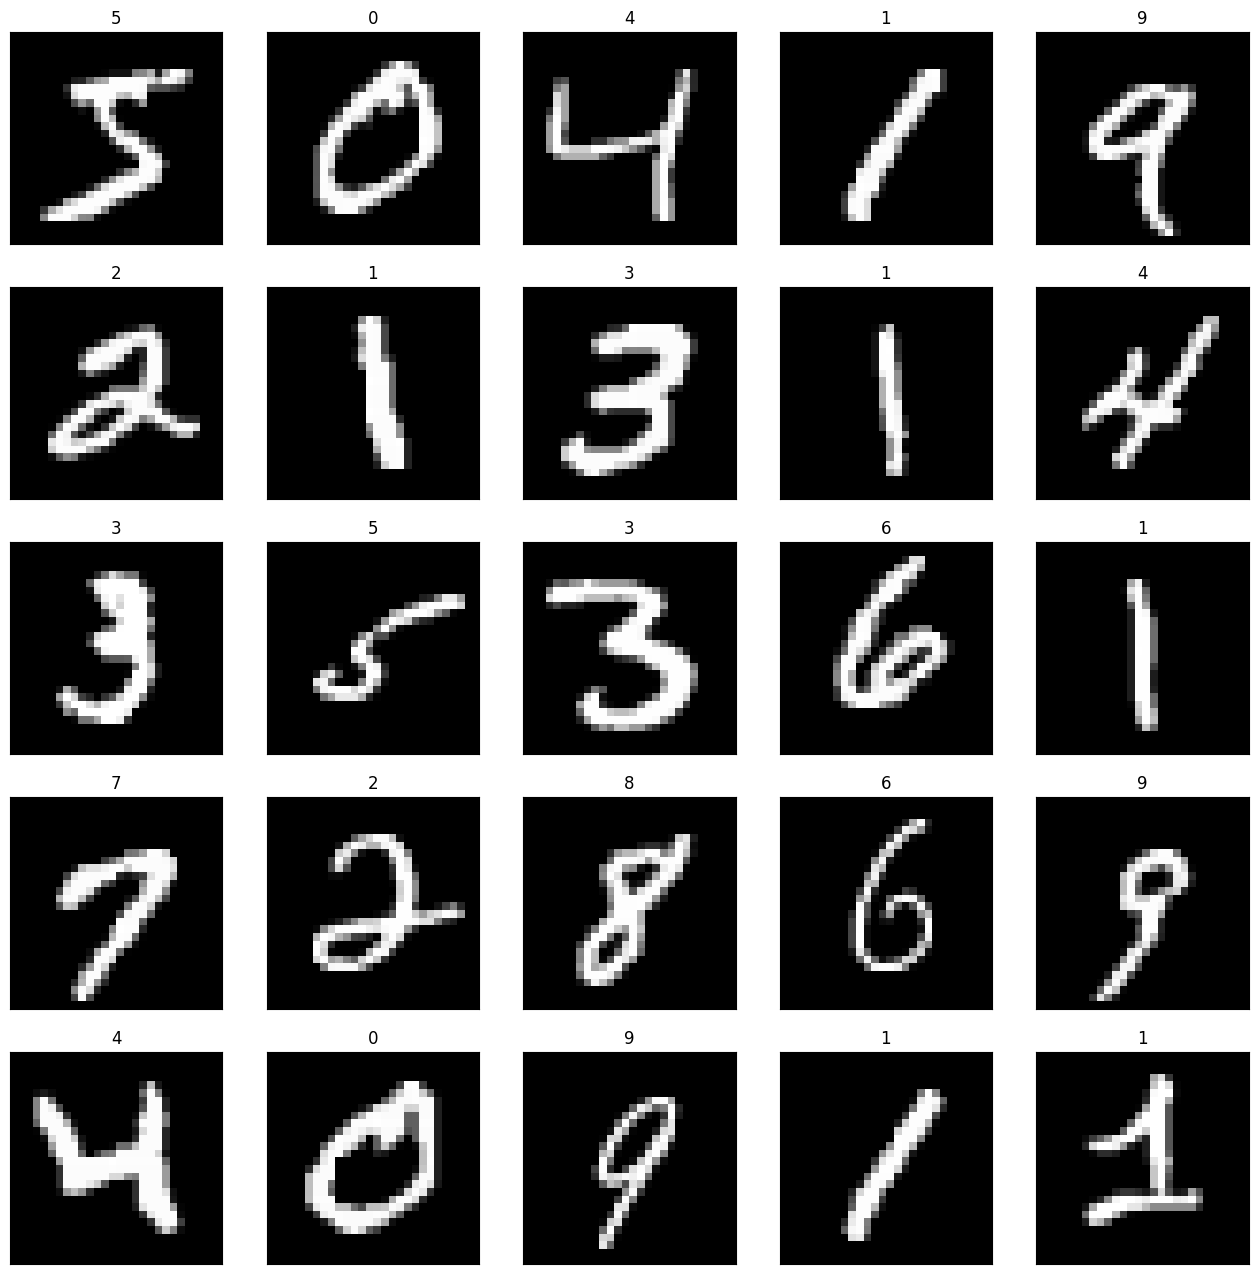

In [32]:
plt.figure(figsize=(16,16))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.title(y_train[i])
    plt.imshow(x_train[i], cmap = 'gray')

##### Data Preparation

In [34]:
# normalize
x_train = x_train / 255
x_test = x_test / 255

In [35]:
x_train[0].shape

(28, 28)

In [36]:
# reshape the data to 3 dimensions
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [37]:
x_train.shape

(60000, 28, 28, 1)

In [38]:
x_test.shape

(10000, 28, 28, 1)

##### Build the CNN model

In [45]:
# create the object
model = Sequential()

# First convolutional layer
conv1 = Conv2D(filters=32, input_shape=(28,28,1), kernel_size=(3,3), activation='relu')
model.add(conv1)

# First pooling layer
pool1 = MaxPool2D(pool_size=(2,2))
model.add(pool1)

# Second convolutional layer
conv2 = Conv2D(filters=64, kernel_size=(3,3), activation='relu')
model.add(conv2)

# Second pooling layer
pool2 = MaxPool2D(pool_size=(2,2))
model.add(pool2)

# Flatten the layer
model.add(Flatten())

# Build the ANN
model.add(Dense(64, activation='relu'))
# Output layer
model.add(Dense(10, activation='softmax'))

In [46]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 64)               

##### Compile the model

In [48]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

##### Train the model

In [50]:
model.fit(x_train, y_train, epochs=10, batch_size=10)

Epoch 1/10
6000/6000 [==============================] - 35s 6ms/step - loss: 0.1101 - accuracy: 0.9661
Epoch 2/10
6000/6000 [==============================] - 31s 5ms/step - loss: 0.0407 - accuracy: 0.9877
Epoch 3/10
6000/6000 [==============================] - 33s 6ms/step - loss: 0.0261 - accuracy: 0.9916
Epoch 4/10
6000/6000 [==============================] - 42s 7ms/step - loss: 0.0199 - accuracy: 0.9938
Epoch 5/10
6000/6000 [==============================] - 38s 6ms/step - loss: 0.0155 - accuracy: 0.9950
Epoch 6/10
6000/6000 [==============================] - 36s 6ms/step - loss: 0.0138 - accuracy: 0.9955
Epoch 7/10
6000/6000 [==============================] - 35s 6ms/step - loss: 0.0106 - accuracy: 0.9966
Epoch 8/10
6000/6000 [==============================] - 35s 6ms/step - loss: 0.0093 - accuracy: 0.9973
Epoch 9/10
6000/6000 [==============================] - 35s 6ms/step - loss: 0.0079 - accuracy: 0.9973
Epoch 10/10
6000/6000 [==============================] - 34s 6ms/step - l

##### Evaluate the model

In [52]:
model.evaluate(x_test, y_test, batch_size=1)

10000/10000 [==============================] - 17s 2ms/step - loss: 0.0423 - accuracy: 0.9904


[0.04229945316910744, 0.9904000163078308]

In [53]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [60]:
new = x_train[5789]

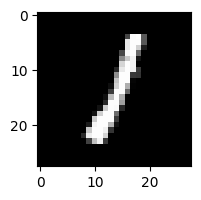

In [61]:
plt.figure(figsize=(2,2))
plt.imshow(new, cmap = 'gray')

In [63]:
new = x_train[5789]
new = new / 255
new = new.reshape(1, 28, 28, 1)
result = model.predict(new, verbose=False)
np.argmax(result)

1